In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
data = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [121]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [122]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [123]:
data.shape

(107, 2)

In [124]:
# Clean the dataset

In [125]:
data.columns=['Month','Sales']

In [126]:
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [127]:
data.isnull().sum()

Month    1
Sales    2
dtype: int64

In [128]:
data[data['Sales'].isnull()]

,Month,Sales
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [129]:
data.drop(index=[105,106], inplace=True)

In [130]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [131]:
data

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [132]:
data.dtypes

Month     object
Sales    float64
dtype: object

In [133]:
data['Month'] = pd.to_datetime(data['Month'])

In [134]:
data

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [135]:
data.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [136]:
data.set_index('Month', inplace=True)

In [137]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


In [138]:
# Vizualize the data

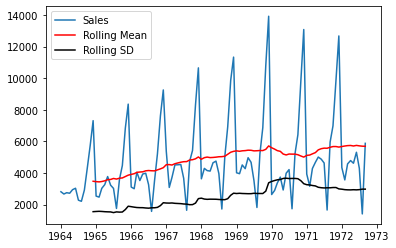

In [139]:
roll_mean = data['Sales'].rolling(12).mean()
roll_sd = data['Sales'].rolling(12).std()
plt.plot(data['Sales'], label = 'Sales')
plt.plot(roll_mean,color='r', label='Rolling Mean')
plt.plot(roll_sd, color='k', label='Rolling SD')
plt.legend()
plt.show()

In [140]:
# Seasonal Decomposition

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose

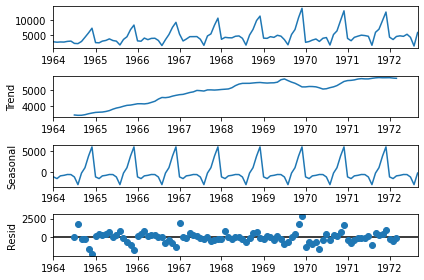

In [142]:
seasonal_decompose(data, model='additive').plot()
plt.show()

In [143]:
# Now we have to make data stationary

## Adfuller Dickyfuller Test

In [144]:
# First we have to test the stationary (adfuller-- Augmented Dickyfuller test)

In [145]:
from statsmodels.tsa.stattools import adfuller

In [146]:
# Ho: Data is not stationary
# Ha: The data is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test statistics','P- Value','# lags used','No. of observations']
    for value,label in zip(result, labels):
        print(label+':'+str(value))
    if result[1]<0.05:
        print('Accpet the Ha: data stationary')
    else:
        print('Accpet the Ho: data is not stationary')

In [147]:
adfuller_test(data['Sales'])

ADF test statistics:-1.8335930563276184
P- Value:0.36391577166024713
# lags used:11
No. of observations:93
Accpet the Ho: data is not stationary


In [148]:
# Diffrencing

In [149]:
data['Sales']

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
               ...  
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: Sales, Length: 105, dtype: float64

In [150]:
data['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [151]:
data['1st Diff']= data['Sales'] - data['Sales'].shift(1)

In [152]:
data

,Sales,1st Diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [153]:
data['Seasonal Diff']= data['Sales'] - data['Sales'].shift(12)

In [154]:
data

,Sales,1st Diff,Seasonal Diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [155]:
adfuller_test(data['Seasonal Diff'].dropna())

ADF test statistics:-7.626619157213164
P- Value:2.060579696813685e-11
# lags used:0
No. of observations:92
Accpet the Ha: data stationary


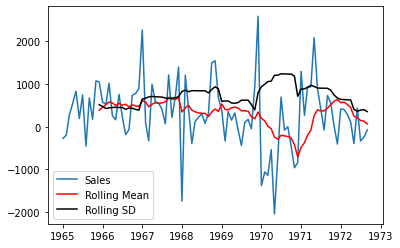

In [156]:
roll_mean = data['Seasonal Diff'].rolling(12).mean()
roll_sd = data['Seasonal Diff'].rolling(12).std()
plt.plot(data['Seasonal Diff'], label = 'Sales')
plt.plot(roll_mean,color='r', label='Rolling Mean')
plt.plot(roll_sd, color='k', label='Rolling SD')
plt.legend()
plt.show()

## Auto regression Model

In [157]:
# Auto correlation plot

In [158]:
from pandas.plotting import autocorrelation_plot

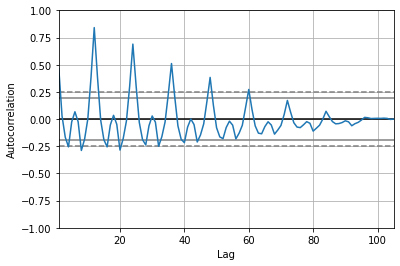

In [159]:
autocorrelation_plot(data['Sales'])
plt.show()

In [160]:
# Plot The ACF and PACF

### ACF and PACF
ARIMA Model : AR- Auto Regressive   p,d,q [p is AR model lag, d is differencing, q is MA lags]
              I- Integrated
              MA- Moving Average
              
The Identification of AR model is best often done with the PACF. For an AR Model the Theoretical PACF
shuts off past the order of the model

The Identification for MA model is often best done with ACF rather than PACF. For MA model ACF does not shut off
but insted it tapers down to 0 in some manner.


In [161]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

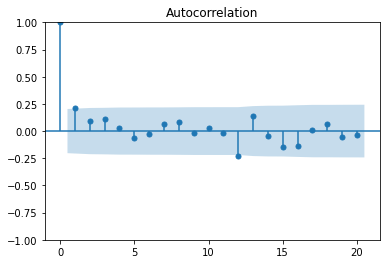

In [162]:
plot_acf(data['Seasonal Diff'].dropna(), lags=20)
plt.show()

In [163]:
# Since the shut off in acf model is at 1 lag the the value of q=1

C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


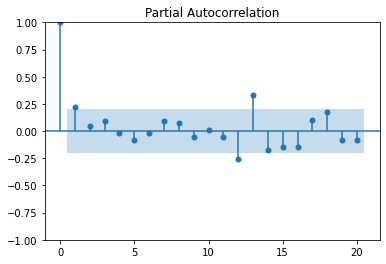

In [164]:
plot_pacf(data['Seasonal Diff'].dropna(), lags=20)
plt.show()

In [165]:
# Since the taper in pacf model is at 1 lag the the value of p=1

In [166]:
# d = 1

In [167]:
from statsmodels.tsa.arima.model import ARIMA

In [168]:
model = ARIMA(data['Sales'], order=(1,1,1))

C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [169]:
model_fit = model.fit()

In [170]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 03 May 2022   AIC                           1911.627
Time:                        15:05:47   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
data['Forecast_ARIMA'] = model_fit.predict(start=90,end=105, dynamic=True)

<AxesSubplot:xlabel='Month'>

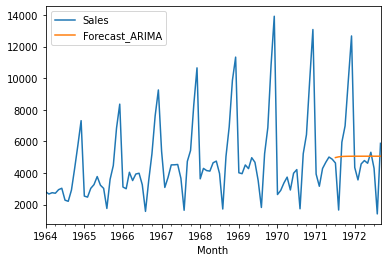

In [172]:
data[['Sales','Forecast_ARIMA']].plot()

In [173]:
data.iloc[90:105,:]

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA
Month,,,,
1971-07-01,4633.0,-241.0,416.0,4977.053556
1971-08-01,1659.0,-2974.0,-79.0,5023.890934
1971-09-01,5951.0,4292.0,730.0,5045.178312
1971-10-01,6981.0,1030.0,557.0,5054.853330
1971-11-01,9851.0,2870.0,9.0,5059.250582
1971-12-01,12670.0,2819.0,-406.0,5061.249113
1972-01-01,4348.0,-8322.0,414.0,5062.157436
1972-02-01,3564.0,-784.0,402.0,5062.570265
1972-03-01,4577.0,1013.0,291.0,5062.757894


# SARIMAX

In [174]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [175]:
model_sarimax = SARIMAX(data['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [176]:
result = model_sarimax.fit()

In [177]:
data['Forecast_SARIMAX'] = result.predict(start=90,end=105, dynamic=True)

<AxesSubplot:xlabel='Month'>

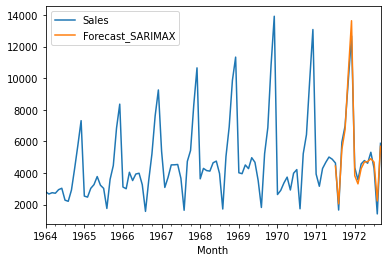

In [178]:
data[['Sales','Forecast_SARIMAX']].plot()

In [179]:
data.iloc[90:105,:]

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
Month,,,,,
1971-07-01,4633.0,-241.0,416.0,4977.053556,4437.324992
1971-08-01,1659.0,-2974.0,-79.0,5023.890934,2050.747690
1971-09-01,5951.0,4292.0,730.0,5045.178312,5493.376617
1971-10-01,6981.0,1030.0,557.0,5054.853330,6752.038843
1971-11-01,9851.0,2870.0,9.0,5059.250582,10327.297262
1971-12-01,12670.0,2819.0,-406.0,5061.249113,13632.323910
1972-01-01,4348.0,-8322.0,414.0,5062.157436,3832.961441
1972-02-01,3564.0,-784.0,402.0,5062.570265,3313.097055
1972-03-01,4577.0,1013.0,291.0,5062.757894,4285.476148


In [180]:
# Forecasting

In [181]:
from pandas.tseries.offsets import DateOffset

In [182]:
future_dates = [data.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [183]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [184]:
new_data = pd.DataFrame(index=future_dates[1:], columns=data.columns)

In [185]:
new_data

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [186]:
fin_data = pd.concat([data,new_data])

In [187]:
fin_data.shape

(128, 5)

In [188]:
model_sarimax = SARIMAX(fin_data['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [189]:
result = model_sarimax.fit()

In [196]:
fin_data['Forecast_SARIMAX'] = result.predict(start=103, end=128,dynamic=True)

<AxesSubplot:>

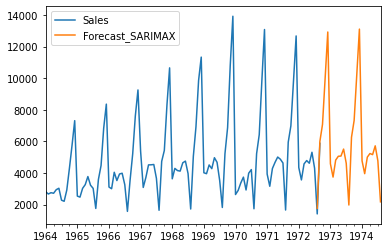

In [197]:
fin_data[['Sales','Forecast_SARIMAX']].plot()

In [198]:
fin_data.tail(30)

,Sales,1st Diff,Seasonal Diff,Forecast_ARIMA,Forecast_SARIMAX
1972-03-01,4577.0,1013.0,291.0,5062.757894,NaN
1972-04-01,4788.0,211.0,112.0,5062.843171,NaN
1972-05-01,4618.0,-170.0,-392.0,5062.881929,NaN
1972-06-01,5312.0,694.0,438.0,5062.899544,NaN
1972-07-01,4298.0,-1014.0,-335.0,5062.907550,NaN
1972-08-01,1413.0,-2885.0,-246.0,5062.911189,1761.633911
1972-09-01,5877.0,4464.0,-74.0,5062.912842,5993.617524
1972-10-01,NaN,NaN,NaN,NaN,7073.962844
1972-11-01,NaN,NaN,NaN,NaN,10027.928805
1972-12-01,NaN,NaN,NaN,NaN,12918.587241
